# K-Nearest-Neighbour Baseline Model Analysis

## Importing Necessary Libraries 

In [43]:
import os 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## Consolodating all csv files of the aggregated dataset into one dataframe

In [12]:
directory = './AggregatedDataset/'

dataset = pd.DataFrame()

for file in os.listdir(directory):
    if file[0] == '.':
        continue
        
    fileDataframe = pd.read_csv(os.path.join(directory,file))
    dataset = pd.concat([dataset,fileDataframe])
    

dataset

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z23,x24,y24,z24,stand,stand-frame,sit,chair,wheelchair,gestureLabel
0,-0.175628,0.204000,2.892272,-0.179617,0.523022,2.860681,-0.181976,0.832459,2.817451,-0.177704,...,2.824489,0.013450,0.157512,2.799201,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.174483,0.203843,2.891971,-0.176972,0.523468,2.860984,-0.177624,0.833758,2.818942,-0.174886,...,2.812625,0.013064,0.147611,2.782450,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.173419,0.203856,2.891706,-0.175530,0.524267,2.861188,-0.176301,0.835714,2.819813,-0.171011,...,2.810357,0.010539,0.150440,2.793991,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.146659,-0.025146,2.835408,-0.146157,0.277126,2.796138,-0.144050,0.571358,2.746070,-0.134127,...,2.570106,0.031963,-0.021461,2.552330,0.5,0.0,0.0,0.5,0.0,1.0
4,-0.118631,-0.259484,2.783743,-0.114505,0.024387,2.733085,-0.110170,0.300262,2.668277,-0.095752,...,2.325600,0.057893,-0.183025,2.328179,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,-0.031074,-0.213648,2.380406,-0.034692,0.044911,2.398920,-0.036498,0.297552,2.407399,-0.033854,...,2.100055,0.117461,0.257843,2.100058,0.0,0.0,0.0,0.0,1.0,0.0
1153,-0.029033,-0.214632,2.382608,-0.031775,0.044897,2.401066,-0.033274,0.298757,2.408886,-0.037971,...,2.264719,0.012311,0.365534,2.229092,0.0,0.0,0.0,0.0,1.0,0.0
1154,-0.028023,-0.214859,2.384013,-0.030562,0.044744,2.401859,-0.032316,0.298115,2.408923,-0.039493,...,2.244769,0.007820,0.395856,2.206886,0.0,0.0,0.0,0.0,1.0,0.0
1155,-0.028775,-0.215633,2.383122,-0.032645,0.043769,2.401059,-0.037751,0.297223,2.407646,-0.039133,...,2.045183,0.149272,0.220268,2.055121,0.0,0.0,0.0,0.0,1.0,0.0


## Seperating Features from Labels 

In [15]:
X = dataset.iloc[:,1:-1]
Y = dataset.iloc[:,-1]
print(X)
print(Y)

            y0        z0        x1        y1        z1        x2        y2  \
0     0.204000  2.892272 -0.179617  0.523022  2.860681 -0.181976  0.832459   
1     0.203843  2.891971 -0.176972  0.523468  2.860984 -0.177624  0.833758   
2     0.203856  2.891706 -0.175530  0.524267  2.861188 -0.176301  0.835714   
3    -0.025146  2.835408 -0.146157  0.277126  2.796138 -0.144050  0.571358   
4    -0.259484  2.783743 -0.114505  0.024387  2.733085 -0.110170  0.300262   
...        ...       ...       ...       ...       ...       ...       ...   
1152 -0.213648  2.380406 -0.034692  0.044911  2.398920 -0.036498  0.297552   
1153 -0.214632  2.382608 -0.031775  0.044897  2.401066 -0.033274  0.298757   
1154 -0.214859  2.384013 -0.030562  0.044744  2.401859 -0.032316  0.298115   
1155 -0.215633  2.383122 -0.032645  0.043769  2.401059 -0.037751  0.297223   
1156 -0.214297  2.380302 -0.035529  0.043504  2.399566 -0.040458  0.295308   

            z2        x3        y3  ...       y23       z23    

## Splitting Data into Train Data and Testing Data

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Finding the Best Set of Hyperparameters for the KNN model

In [117]:
knn = KNeighborsClassifier()
KFold_param = KFold(n_splits=10, shuffle=True)
knn_neighbours_range = range(4,10)
weights_values = ['uniform', 'distance']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', ]

knn_parameters = {'n_neighbors': knn_neighbours_range, 'weights':weights_values, 'p':[1,2], # p=2 for euclidian
                    'algorithm': algorithm_values, 'metric':['minkowski']}

In [118]:
knn_classifier = GridSearchCV(knn, knn_parameters, cv=KFold_param)
knn_classifier.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['minkowski'], 'n_neighbors': range(4, 10),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [119]:
knn_classifier.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [120]:
knn_classifier.best_score_

0.9323615701326524

In [121]:
knn_parameter_results = knn_classifier.cv_results_
# knn_parameter_results

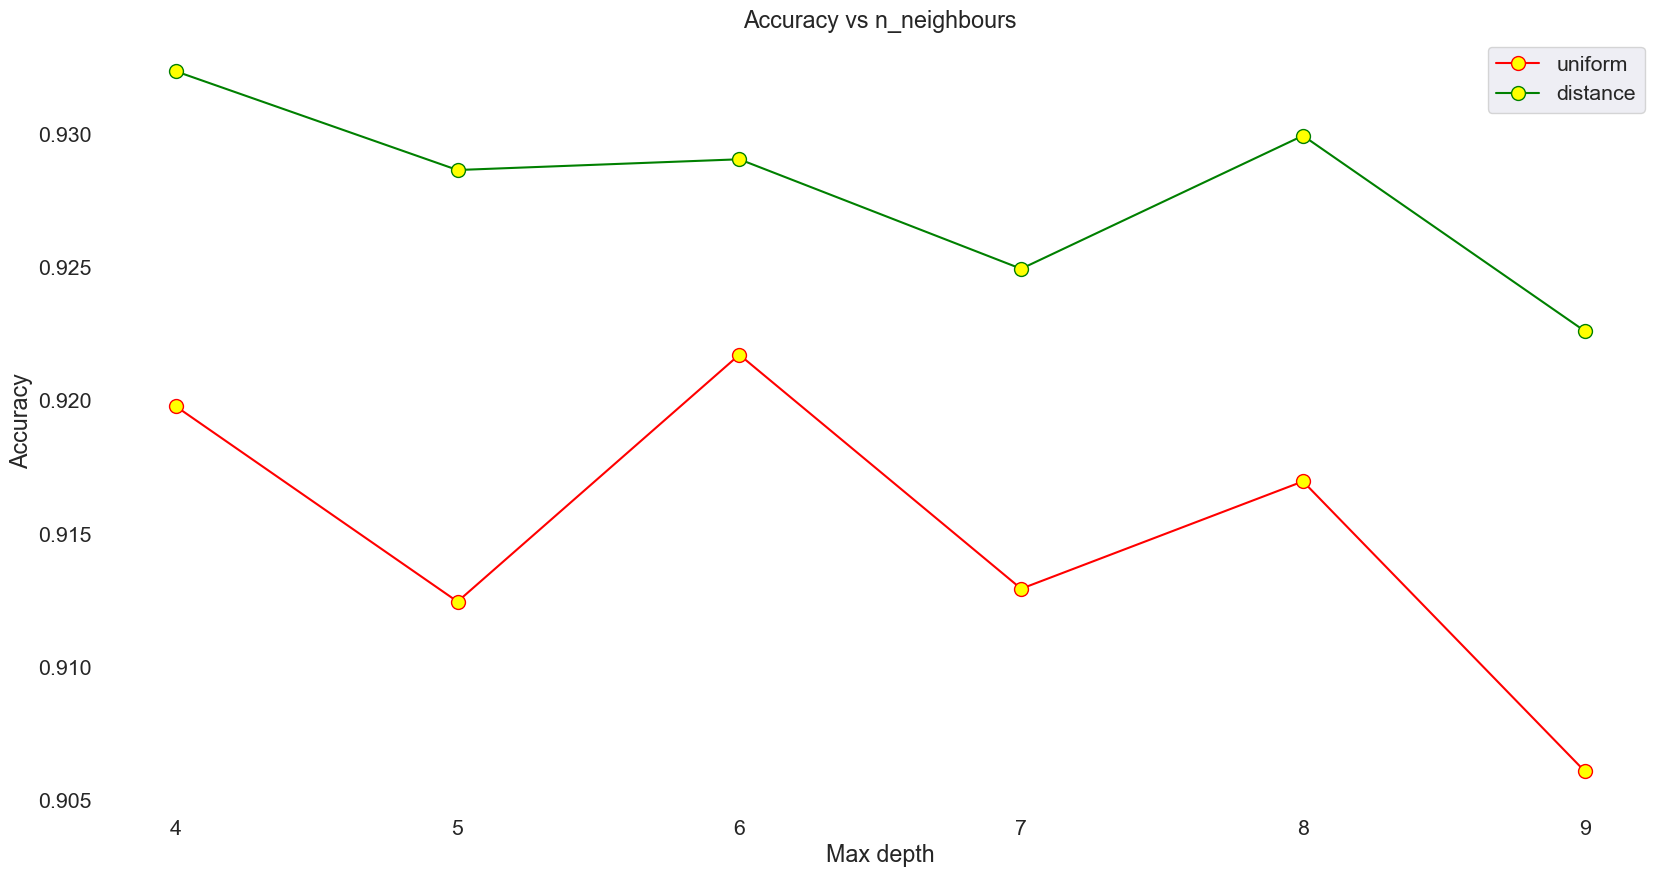

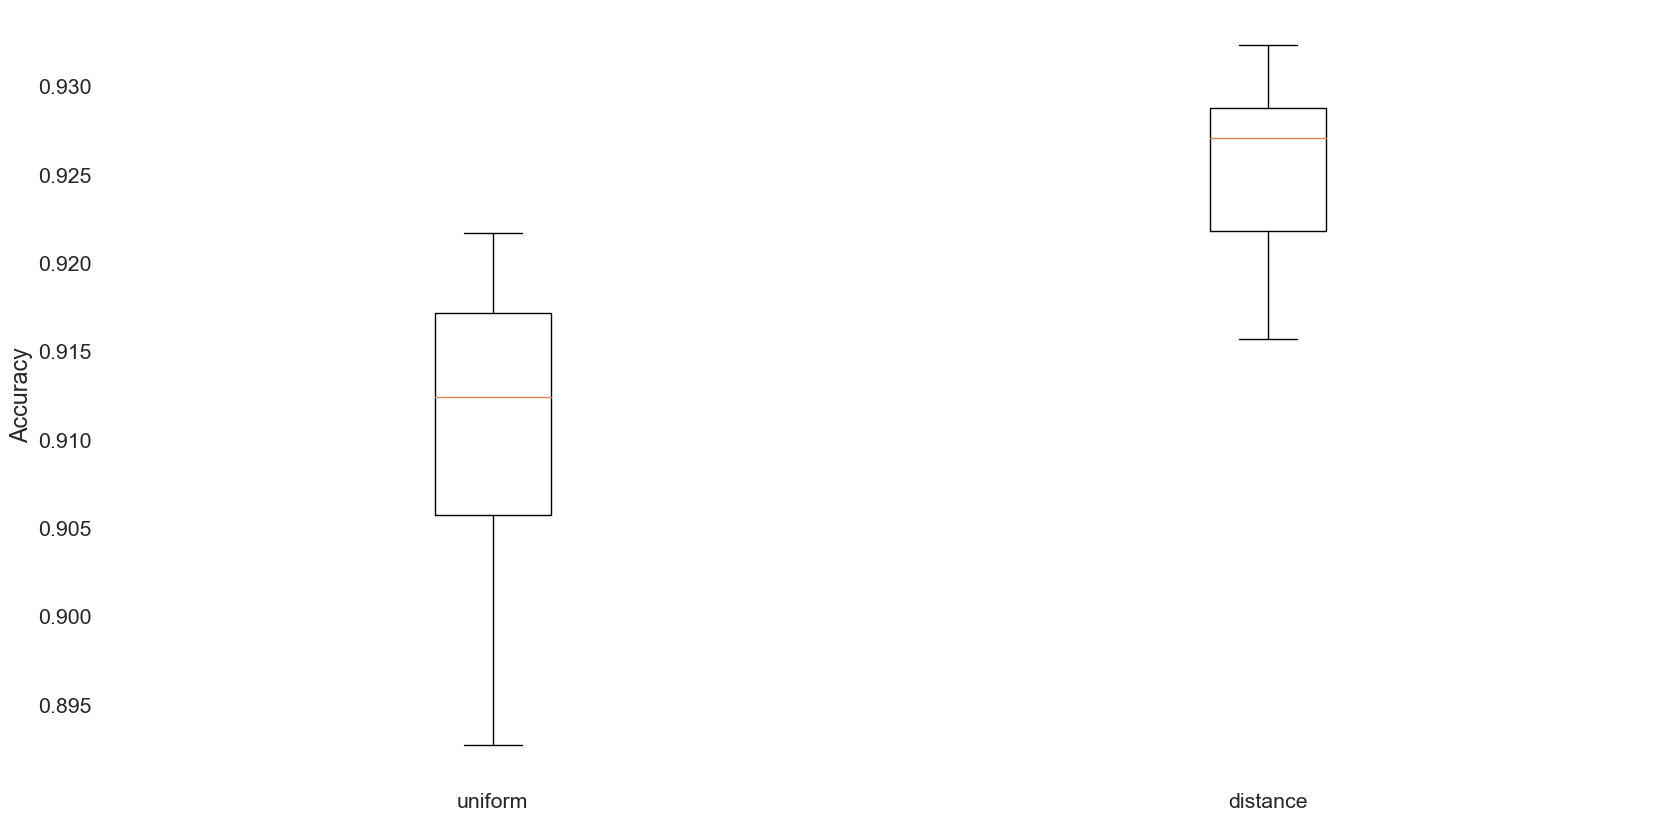

In [122]:
weights_dict = defaultdict(list)
knn_neighbours_range_dict = defaultdict(list)

cv_results = knn_classifier.cv_results_

for mean_score, std_score, params in zip(cv_results["mean_test_score"], cv_results["std_test_score"], cv_results["params"]):
    weights_dict[params['weights']].append(mean_score)


plt.figure(figsize=(20,10))
plt.plot(range(4,10), weights_dict['uniform'][0:6], color='red', linestyle='solid', marker='o', markerfacecolor='yellow', markersize=10)
plt.plot(range(4,10), weights_dict['distance'][0:6], color='green', linestyle='solid', marker='o', markerfacecolor='yellow', markersize=10)
plt.legend(['uniform', 'distance'], loc="upper right")
plt.gca().set_facecolor("none") 
plt.title('Accuracy vs n_neighbours')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# Plot Box and Whiskers (for criterion)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.boxplot(list(weights_dict.values()))
plt.ylabel('Accuracy')
ax.set_xticklabels(list(weights_dict))
plt.gca().set_facecolor("none") 
plt.show()

## Classification Report for the summarizing the model's performance for different labels in the dataset

In [123]:
gestureLabels = ['Elbow Flexion Left', 'Elbow Flexion Right', 'Shoulder Flexion Left', 'Shoulder Flexion Right', 'Shoulder Abduction Left', 'Shoulder Abduction Right', 'Shoulder Forward Elevation', 'Side Tap Left', 'Side Tap Rigtht']
Y_pred = knn_classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       108
         1.0       0.88      0.89      0.89       142
         2.0       0.95      0.89      0.91       176
         3.0       0.88      0.85      0.86       150
         4.0       0.96      0.91      0.94       179
         5.0       0.91      0.96      0.93       132
         6.0       0.99      0.98      0.98       185
         7.0       0.88      0.93      0.90       136
         8.0       0.92      0.92      0.92       172

    accuracy                           0.92      1380
   macro avg       0.91      0.92      0.91      1380
weighted avg       0.92      0.92      0.92      1380



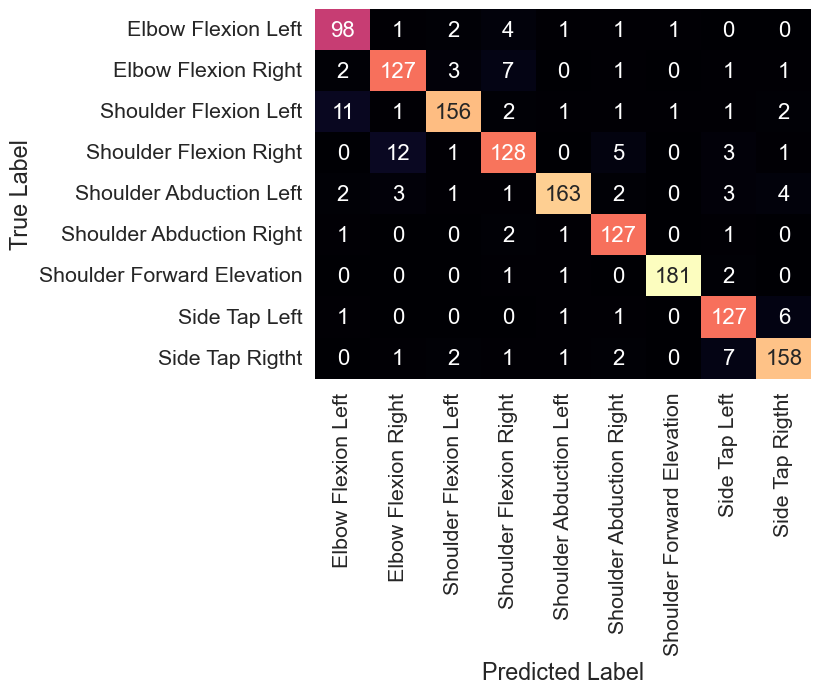

In [124]:
label_map = {0: gestureLabels[0], 
             1: gestureLabels[1], 
             2: gestureLabels[2],
             3: gestureLabels[3], 
             4: gestureLabels[4],
             5: gestureLabels[5], 
             6: gestureLabels[6],
             7: gestureLabels[7], 
             8: gestureLabels[8]}
labels = [label_map[i] for i in range(len(label_map))]
# Create example confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as heatmap
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="magma", fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)

# Set plot labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()